# 神经网络的数据基础

## 初识神经网络

### 手写数字辨识

1. 加载Keras中的MNIST数据集

In [6]:
from tensorflow.python.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

图像被编码为Numpy数组，标签是数字数组，取值范围为0-9。图像与标签一一对应。

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

图像样例显示：

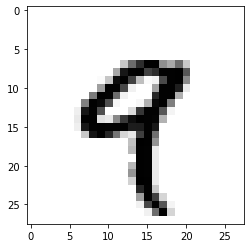

In [14]:
digit=train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

***

2. 构建网络

In [17]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

网络最后一层是一个10路softmax层，它返回一个由10个概率值(总和为1)组成的数组。每个概率值表示当前数字图像属于10个数字类别的某一个的概率。

***

3. 编译

In [18]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

参数解释：<br>
**损失函数(loss function)**：<br>
**优化器(optimizer)**：基于训练数据和损失函数来更新呢网络的机制。<br>
**在训练和测试过程中需要监控的指标(metric)**：本例中只关心精度(accuracy)。<br>


****

4. 准备图像数据

In [19]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

5. 准备标签

In [20]:
from tensorflow.python.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

***

6. 训练网络

在训练数据上拟合(fit)模型。

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2600 - acc: 0.9247
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1037 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0680 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0500 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0377 - acc: 0.9884


检测模型在训练集上的性能。

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.0699 - acc: 0.9793
test_acc: 0.9793


训练集上的准确率为98.84%，测试集上的准确率为97.93%，低了不少，这种差距是由**过拟合**造成的。<br>
**过拟合**：机器学习模型在新数据上的性能往往比训练数据上要差。

## 神经网络的数据表示

存储数组的多维Numpy数组称为**张量(tensor)**。张量是一个数字容器，张量的维度叫做**轴(axis)**。

### 标量(0D张量)

仅包含一个数字的张量叫**标量(scalar)**。标量有0个轴(ndim==0)。张量轴的个数叫做**阶(rank)**。

In [2]:
import numpy as np
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

### 向量(1D张量)

数字组成的数组叫**向量(vector)**或一维张量(1D张量)，它有一个轴。

In [4]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [5]:
print(x.ndim)
print(x.shape)

1
(5,)


因为x含有5个元素，又称为**5D向量**，它只有一个轴，沿着轴有5个**维度**，5D张量有5个轴(沿着每个轴可能有任意个维度)。**维度**可以表示沿着某个轴上的元素个数(如5D向量)，也可以表示张量中轴的个数(如5D张量)，为了避免混淆，用**5阶张量**专指高阶张量的轴的个数。

### 矩阵(2D张量)

In [6]:
x=np.array([[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]])
print(x.ndim)
print(x.shape)

2
(3, 5)


### 3D张量与更高维张量

多个矩阵合成一个3D张量

In [4]:
x=np.array([
            [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
            [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
            [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]]
          ])
x.ndim

3

多个3D张量可合成一个4D张量，以此类推。深度学习一般处理0D～4D数据，视频数据可能会遇到5D张量。

### 张量关键属性

* **轴的阶(个数)**ndim
* **形状**shape
* **数据类型**dtype

### 在Numpy中操作张量

选出第10~15张图片(不包括第15张)。张量中的每一个元素叫一个**张量切片(tensor slicing)**。

In [17]:
my_slice = train_images[10:15]
my_slice.shape

(5, 28, 28)

等价写法1：

In [18]:
my_slice = train_images[10:15, :, :]
my_slice.shape

(5, 28, 28)

等价写法2：

In [19]:
my_slice = train_images[10:15, 0:28, 0:28]
my_slice.shape

(5, 28, 28)

**选择图片中的一块区域：**

In [20]:
my_slice = train_images[:, 14:, 14:] # 选择所有图中右下角14像素×14像素的区域
my_slice.shape

(60000, 14, 14)

In [21]:
my_slice = train_images[:, 7:-7, 7:-7]  # 选择所有图中心的14像素×14像素
my_slice.shape

(60000, 14, 14)

### 数据批量

通常深度学习中所有数据张量的第一个轴(0轴)，是**样本轴(simples axis)**(**或样本维度，批量轴(batch axis)，批量维度(batch dimension)**)。

In [ ]:
# 第一个批量
batch = train_images[:128]
# 第二个批量
batch = train_images[128:256]
# 第n个批量
batch = train_images[128 * n:128 * (n + 1)]

### 现实世界中的数据张量

1. 向量数据，形状为（samples, features）<br>
如人口统计数据集，每个人的年龄，邮编，收入作为一个向量在数据集中存在，假设包含10000个人，则张量形状为(10000, 3)。<br>
如文本文档数据集，假设字典中有20000个单词，共有500个文档，每个文档表示该词出现的次数，则张量形状为(500, 20000)。<br>

2. 时间序列数据或序列数据，形状为(samples, timesteps, features)
<img src='images/1.png'/>
股票价格数据集：<br>
    &emsp;&emsp;(当前价格，前一分钟的最高价格，前一分钟的最低价格)---->一分钟<br>
    &emsp;&emsp;一分钟----->(3,)<br>
    &emsp;&emsp;一天  ----->(290, 3)<br>
    &emsp;&emsp;一年  ----->(250, 290, 3)<br>
推文数据集：<br>
    &emsp;&emsp;假设一条推文有280个字符组成，每个字符被编码大小为128的二进制向量。则<br>
    &emsp;&emsp;一条推文---->(280, 128)<br>
    &emsp;&emsp;100万条推文---->(100万, 280, 128)<br>

3. 图像数据，形状为(samples, height, width, channels)
<img src='images/2.png'/>
灰度图像(如手写数字图像)的通道只有一维,形状为(128,256,256,1)，通常彩色图像的通道为3维，如果有128张图像大小为256*256图片，则其数据形状为(128, 256, 256, 3)

4. 视频数据，形状为(samples, frames, height, width, channels)<br>
&emsp;&emsp;假设一个视频有240帧(每一帧是一个彩色图像)，视频尺寸为144*256，那么4个这样的视频的数据形状为(4, 240, 144, 256, 3)

## 神经网络的张量计算

`layer.Dense(512, activation='relu')
其输出值output = relu(dot(W, input) + b)`dot不是逐元素运算(类似普通矩阵的乘积)，+b是逐元素运算。

### 逐元素运算(element-wise)

### 广播

进行逐元素运算需要两张量的大小相同，对于不相同的张量进行广播，使其大小相同。<br>
如X-->(32, 10), Y-->(10,)，对Y进行广播后Y-->(32, 10).**广播只用于运算，不会改变原来张量**

广播形式：<br>
&emsp;&emsp;若X-->(a,b,...,n,n+1,...,m), Y-->(n,n+1,...,m)，进行逐元素运算时，Y会被广播成Y-->(a,b,...,n,n+1,...,m)

In [2]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(x.shape)
print(y.shape)
print(z.shape)

(64, 3, 32, 10)
(32, 10)
(64, 3, 32, 10)


In [4]:
y = np.random.random((64, 3))
z = np.maximum(x, y)
print(x.shape)
print(y.shape)
print(z.shape)

ValueError: operands could not be broadcast together with shapes (64,3,32,10) (64,3) 

In [3]:
y = np.random.random((3, 32))
z = np.maximum(x, y)
print(x.shape)
print(y.shape)
print(z.shape)

ValueError: operands could not be broadcast together with shapes (64,3,32,10) (3,32) 

### 张量点积(np.dot())

张量是矩阵的时候，就是线代中的矩阵乘积。对于更高维的张量，有如下形式：<br>
(a,b,c,d) . (d,) -> (a,b,c)<br>
(a,b,c,d) . (d,e) -> (a,b,c,e)

<img src='images/3.png'/>


对于张量形状的理解：<br>
&emsp;&emsp;(a,b,c,d)：其实是一个层层嵌套的形式，每一层大小为(c,d)的矩阵，然后这样的矩阵叠b层，然后再将叠加后的张量再叠a层，最后的张量的大小就是(a,b,c,d)。

### 张量变形(tensor reshaping)

In [10]:
x = np.array([
    [0., 1.], 
    [2., 3.], 
    [4., 5.]
])
print(x.shape)
print(x)

(3, 2)
[[0. 1.]
 [2. 3.]
 [4. 5.]]


In [9]:
x = x.reshape((6, 1))
print(x.shape)
print(x)

(6, 1)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


**转置(transposition)**:

In [12]:
x=np.zeros((300,200))
x=np.transpose(x)
x.shape

(200, 300)

## 神经网络的“引擎”：基于梯度的优化

&emsp;&emsp;给定一个由很多参数组成的神经网络(参数初始值是随机初始化的)，选出一批数据放入网络中产生一个预测结果y_pred，利用y_pred与y的差距(loss)来更新参数。若存在参数$w_n$，在其他参数不变的前提下，取值为0.3时，loss=0.5，取值为0.1时，loss=0.2，损失下降了，那么我们就将参数$w_n$更新为0.1。对每个参数都如此做，这就是神经网络的训练过程。但是计算量太大，一个可以替代的方式是，假设神经网络中所有的运算都是**可微(differentiable)**的，计算loss对$w_n$的梯度，通过梯度改变参数，使loss降低。

**小批量随机梯度下降(mini-batch stochastic gradient descent, 小批量SGD)**

1. **随机**抽取训练样本x与对应目标值y组成的数据批量。
2. 在x上运行网络，得到预测值y_pred
3. 计算在这批数据上的损失，用于**衡量y_pred与y之间的距离**。
4. 计算损失相对于网络参数的梯度(一次**反向传播(backward pass)**)
5. 将参数沿着梯度的反方向移动一点，如$W-=step*gradient$，从而减小损失。

**小批量SGD的变体**：

* **真SGD**：每次迭代只选一个样本和目标。
* **批量SGD**：每次迭代选择全部样本和目标。更新准确但代价高。
* **这部分变体下一次权重更新时考虑了上一次权重更新，而不止考虑当前梯度值。**
>**带动量的SGD**<br>
**Adagrad**<br>
**RMSProp**<br>


这些变体被成为**优化方法(optimization method)**或**优化器(optimizer)**

<font color='#c83ec0' size=3>神经网络中每一个权重参数都是空间中的一个自由维度。所有参数组成一个空间，而具体的参数$W$是参数空间中的一个点而已。梯度下降，就是找到向哪个方向走，使得loss降低最快。</font>

### 链式求导：反向传播算法

&emsp;&emsp;一个三层网络的运算可用下式表示：$f(W_1,W_2,W_3)=a(W_1,b(W_2,c(W_3)))$
$W_3$是输入层$c$的样本数据，中间层$b$利用输入数据与其权重$W_2$做运算输出结果到输出层$a$，$a$利用其权重$W_1$与$b$层的输出数据输出最终结果$f$。进而可以计算$\frac{\partial f}{\partial W_i}$。